In [1]:
import nltk

In [ ]:
ntlk.downoald_shell()

In [3]:
import pandas as pd
messages=pd.read_csv("C:/Users/pc/Documents/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection",sep='\t',names=['labels','messages'])

In [4]:
messages.describe()

,labels,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
messages.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
messages.groupby('labels').describe()

messages                                                               
          count unique                                                top freq
labels                                                                        
ham        4825   4516                             Sorry, I'll call later   30
spam        747    653  Please call our customer service representativ...    4

In [8]:
messages['length']=messages['messages'].apply(len)

In [9]:
messages.head()

,labels,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import seaborn as sns

<AxesSubplot:ylabel='Frequency'>

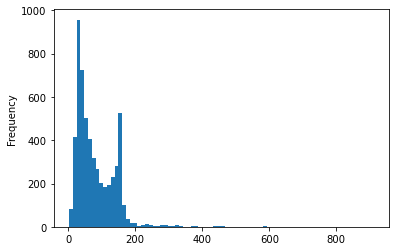

In [13]:
messages['length'].plot.hist(bins=80)

In [14]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [16]:
messages.loc[messages['length']==910]

,labels,messages,length
1085,ham,For me the love should start with attraction.i...,910


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

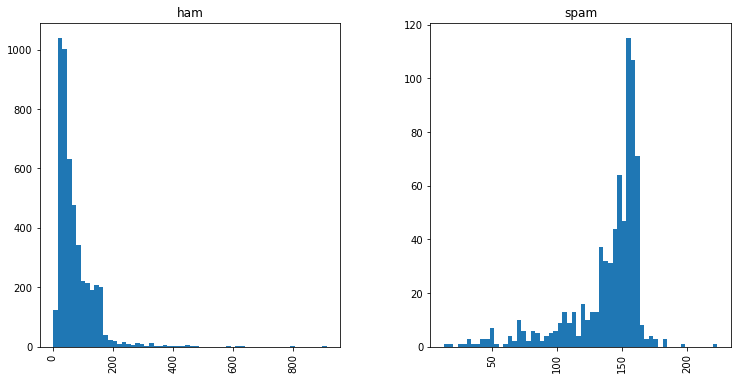

In [19]:
messages.hist(column='length',by='labels',bins=60,figsize=(12,6))

In [20]:
import string

In [22]:
from nltk.corpus import stopwords

In [23]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
mess='Sample message! Notice: it has ponctuation. '

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
nopunc=[c for c in mess if c not in string.punctuation]

In [29]:
nopunc=''.join(nopunc)


In [32]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'ponctuation']

In [35]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

In [36]:
clean_mess

['Sample', 'message', 'Notice', 'ponctuation']

In [38]:
def text_process(mess):
    nopunc=[c for  c in mess if c not in string.punctuation]
    nopunc=''.join(nopunc)
    mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]
    return mess

In [41]:
messages['messages'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
bow_transfomer=CountVectorizer(analyzer=text_process).fit(messages['messages'])

In [46]:
print(len(bow_transfomer.vocabulary_))

11425


In [53]:
bow_transfomer.get_feature_names()[4068]

'U'

In [55]:
messages_bow=bow_transfomer.transform(messages['messages'])

In [58]:
from sklearn.feature_extraction.text import TfidfTransformer

In [59]:
tfidftransformer=TfidfTransformer().fit(messages_bow)

In [60]:
messages_tfidf=tfidftransformer.transform(messages_bow)

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
spam_detect_model= MultinomialNB().fit(messages_tfidf,messages.labels)

In [65]:
all_pred=spam_detect_model.predict(messages_tfidf)

In [67]:
from sklearn.model_selection import train_test_split

In [70]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['messages'],messages['labels'],test_size=0.33)

In [71]:
from sklearn.pipeline import Pipeline

In [73]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [74]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000023B492FB0D0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [75]:
predictions=pipeline.predict(msg_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
classification_report(label_test,predictions)

'              precision    recall  f1-score   support\n\n         ham       0.94      1.00      0.97      1582\n        spam       1.00      0.62      0.77       257\n\n    accuracy                           0.95      1839\n   macro avg       0.97      0.81      0.87      1839\nweighted avg       0.95      0.95      0.94      1839\n'